In [1]:
import pandas as pd
import numpy as np

In [2]:
auto = pd.read_csv('auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
# Data preparation for the model
#Horsepower and car name fiels are string datatypes which is showing as object in pandas dataframe.
# removing the car name column
auto1 = auto.drop(["car name"], axis=1)
auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
#Lets check the number of missing values per column
auto1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [6]:
auto1.shape

(398, 8)

In [7]:
# Few of the values in horsepower column is missing and its '?', so this colum in 
# showing a object we can repleace this with the mean value
auto1.loc[~auto1['horsepower'].str.isdigit(), 'horsepower'].tolist()

['?', '?', '?', '?', '?', '?']

In [8]:
auto1['horsepower'].iloc[[31,32,33]]

31     95
32      ?
33    100
Name: horsepower, dtype: object

In [9]:
auto1['horsepower'] = auto1['horsepower'].replace('?', np.nan).astype('float64')

In [10]:
auto1.iloc[[31,32,33]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
31,25.0,4,113.0,95.0,2228,14.0,71,3
32,25.0,4,98.0,NaN,2046,19.0,71,1
33,19.0,6,232.0,100.0,2634,13.0,71,1


In [11]:
auto1['horsepower'] = auto1['horsepower'].fillna(auto1['horsepower'].mean())

In [12]:
auto1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [13]:
auto1['horsepower'].isna().sum()
# Here the ? were converted to missing values.

0

In [14]:
auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [15]:
#varification on missing value has been replaced by mean
auto1.iloc[[31,32,33]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
31,25.0,4,113.0,95.000000,2228,14.0,71,3
32,25.0,4,98.0,104.469388,2046,19.0,71,1
33,19.0,6,232.0,100.000000,2634,13.0,71,1


In [16]:
#creating dummy variable for origin column
auto1['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [17]:

origins = pd.get_dummies(auto1['origin']).rename(columns=lambda x: 'origin' + str(x))
auto2 = pd.concat([auto1, origins], axis=1)
auto2.drop(['origin'], inplace=True, axis=1)


In [18]:
auto2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin1,origin2,origin3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


<AxesSubplot:>

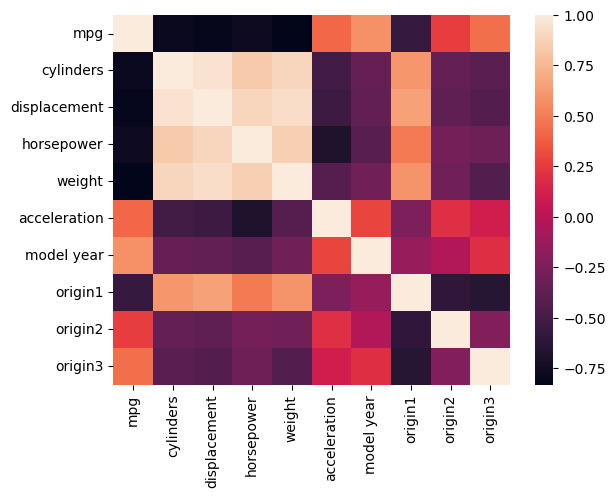

In [19]:
#Ploting correlation matrix with heatmap
# calculate the correlation matrix
import seaborn as sns
corr = auto2.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [20]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin1,origin2,origin3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


In [21]:
# here from the correlation heat-map we can say, displacement and weight are highly correlated with mpg.

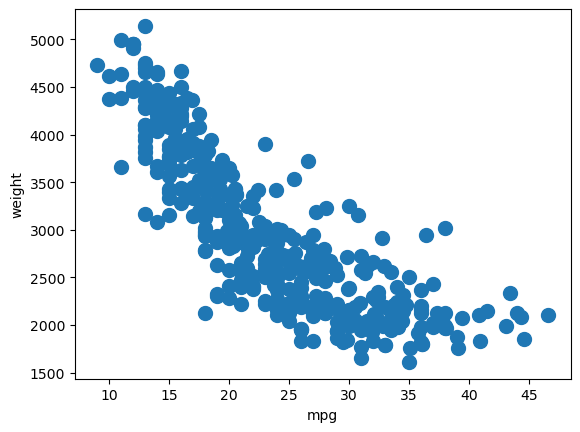

In [22]:
#scatter plot for weight and mgp
auto2.plot.scatter(x = 'mpg', y = 'weight', s = 100);

In [23]:
# The scatter plot clearly shows negative correlation between wight and mpg, i.e if the weight is more then mpg is less 
#where as less weight shows high mpg 

In [24]:
# Lets split the data 80-20 for liner regresion where dependent variable is mpg
from sklearn.model_selection import train_test_split
X = auto2.drop('mpg', axis=1)
Y = auto2['mpg']

In [25]:
auto2.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin1         0
origin2         0
origin3         0
dtype: int64

In [26]:
X.shape , Y.shape

((398, 9), (398,))

In [27]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [28]:
#Fitting ordinary liner function
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [29]:
clf.fit(x_train,y_train)

LinearRegression()

In [30]:
clf.predict(x_test)

array([23.74660873, 25.09637937, 28.84001835, 22.34628293, 35.26347495,
       27.99183421, 31.80391432, 24.89467473, 29.62166898, 30.89583901,
       26.17373604, 15.55775801, 15.54870185, 29.96553413, 16.36162819,
       15.51478368, 22.97961125, 26.59854686, 14.75203537, 33.10513222,
       15.63426121, 16.23372207, 36.05134587, 33.53228071, 21.33246554,
       29.45794386, 31.59476064, 32.55521326, 20.56031572, 12.32316347,
       10.1381174 , 21.89669291, 20.30664285, 29.0668208 , 31.10502079,
       35.94581303, 25.42907308, 24.92660753, 12.34222413, 17.14589751,
       31.7866614 , 23.89637203, 28.03867038, 30.9580916 , 23.9987406 ,
       32.84545866, 21.10359216, 16.81634755, 16.6923399 , 28.43848246,
       15.72122935, 32.48397203, 12.00524148, 14.09999839, 23.46806924,
       16.8645353 , 22.41519099, 10.86093264, 24.74376769, 27.06941921,
       27.09832544, 23.59754279, 33.51557817, 23.95017135, 25.89162098,
       10.35133182, 29.52539828, 20.22726277, 20.6603126 , 16.28

In [31]:
#Lets test the accuracy of the model 
clf.score(x_test,y_test)

0.814018919128679

In [36]:
#Calculating and interpreting MAE, RMSE and R2
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_train, clf.predict(x_train))
mse = metrics.mean_squared_error(y_train, clf.predict(x_train))
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_train, clf.predict(x_train))
print("="*100)
print("Regression Accuracy on Train Data")
print("MAE : "+str(mae))
print("RMSE : "+str(rmse))
print("R2 : "+str(r2))


mae = metrics.mean_absolute_error(y_test, clf.predict(x_test))
mse = metrics.mean_squared_error(y_test, clf.predict(x_test))
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, clf.predict(x_test))
print("="*100)
print("Regression Accuracy on Test Data")
print("MAE : "+str(mae))
print("RMSE : "+str(rmse))
print("R2 : "+str(r2))

Regression Accuracy on Train Data
MAE : 2.501551287171274
RMSE : 3.253834222347141
R2 : 0.8257071418279452
Regression Accuracy on Test Data
MAE : 2.549801483089845
RMSE : 3.3701346637939493
R2 : 0.814018919128679



    MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set. This error is low as 2.5 which implies a good fit.
    MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set. 
    RMSE (Root Mean Squared Error) is the error rate by the square root of MSE. This error is 3.2 which is quite low.
    R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is. This value 0.81 is quite high which represents a good fit.


# Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
# Creating an object of the Lasso Regression model class  
l_reg = Lasso(random_state=9)
l_reg.fit(x_train,y_train)

Lasso(random_state=9)

In [46]:
mae = metrics.mean_absolute_error(y_train, l_reg.predict(x_train))
mse = metrics.mean_squared_error(y_train, l_reg.predict(x_train))
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_train, l_reg.predict(x_train))
print("="*100)
print("Regression Accuracy on Train Data")
print("MAE : "+str(mae))
print("RMSE : "+str(rmse))
print("R2 : "+str(r2))


mae = metrics.mean_absolute_error(y_test, l_reg.predict(x_test))
mse = metrics.mean_squared_error(y_test, l_reg.predict(x_test))
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, l_reg.predict(x_test))
print("="*100)
print("Regression Accuracy on Test Data")
print("MAE : "+str(mae))
print("RMSE : "+str(rmse))
print("R2 : "+str(r2))

Regression Accuracy on Train Data
MAE : 2.6530338875524495
RMSE : 3.453425498855223
R2 : 0.803668977044101
Regression Accuracy on Test Data
MAE : 2.45987738279937
RMSE : 3.3485714612946826
R2 : 0.8163912385528017


# Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
# Creating an object of the Lasso Regression model class  
r_reg = Ridge(random_state=9)
r_reg.fit(x_train,y_train)

Ridge(random_state=9)

In [48]:
mae = metrics.mean_absolute_error(y_train, r_reg.predict(x_train))
mse = metrics.mean_squared_error(y_train, r_reg.predict(x_train))
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_train, r_reg.predict(x_train))
print("="*100)
print("Regression Accuracy on Train Data")
print("MAE : "+str(mae))
print("RMSE : "+str(rmse))
print("R2 : "+str(r2))


mae = metrics.mean_absolute_error(y_test, r_reg.predict(x_test))
mse = metrics.mean_squared_error(y_test, r_reg.predict(x_test))
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test, r_reg.predict(x_test))
print("="*100)
print("Regression Accuracy on Test Data")
print("MAE : "+str(mae))
print("RMSE : "+str(rmse))
print("R2 : "+str(r2))

Regression Accuracy on Train Data
MAE : 2.5018987539891167
RMSE : 3.2538881379372038
R2 : 0.8257013657622305
Regression Accuracy on Test Data
MAE : 2.545521221885981
RMSE : 3.3668775103593083
R2 : 0.8143782378184384
